# Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest.

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def accent(X, Y, axis, split, criteria='accuracy'):
    splitdatar = []
    splitdatal = []
    for i in range(len(X)):
        if(X[i,axis] >= split):
            splitdatar.append(Y[i])
        else:
            splitdatal.append(Y[i])
    if(len(splitdatar) == 0 or len(splitdatal) == 0):
        if(criteria == "accuracy"):
            return -1
        elif(criteria == 'entropy'):
            return 1e5
    else:
        if(criteria == "accuracy"):
            accuracy = (splitdatar.count(1) + splitdatal.count(-1))/len(Y)
            if(1-accuracy > accuracy):
                accuracy = 1-accuracy
            return accuracy
        elif(criteria == 'entropy'):
            pl = len(splitdatal)/len(Y)
            pr = len(splitdatar)/len(Y)
            ql = splitdatal.count(1)/len(splitdatal)
            qr = splitdatar.count(1)/len(splitdatar)
            if(ql == 0 or ql == 1):
                hl = 0 
            else:
                hl = ql*np.log2(1/ql) + (1-ql)*np.log2(1/(1-ql))
            if(qr == 0 or qr == 1):
                hr = 0
            else:
                hr = qr*np.log2(1/qr) + (1-qr)*np.log2(1/(1-qr))
            entropy = pl * hl + pr * hr
            return entropy
        

def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y. 
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """
    forest=[]
    for i in range(num_trees):
        tree=[]; incompletenodes=[]; totalnodes=0; xdivision=np.zeros((X.shape[1],10))
        m=np.random.randint(0,len(X),int(a*len(X)))
        Xa=X[m]
        Ya=Y[m]
        for i in range(Xa.shape[1]):
            xdivision[i]=np.linspace(np.amin(Xa[:,i]),np.amax(Xa[:,i]),12)[1:11] 

        if(criterion=="accuracy"):
            maxacc=0; splitpt=0; axis=0; leaf="None";
            for i in range(Xa.shape[1]):
                for j in range(10):
                        ma=accent(Xa,Ya,i,xdivision[i][j])
                        if(ma>maxacc):
                            maxacc=ma
                            splitpt=xdivision[i][j]
                            axis=i
        elif(criterion=="entropy"):
            minent=1e5; splitpt=0; axis=0; leaf="None";
            for i in range(Xa.shape[1]):
                for j in range(10):
                        en=accent(Xa,Ya,i,xdivision[i][j],"entropy")
                        if(en<minent):
                            minent=en
                            splitpt=xdivision[i][j]
                            axis=i

        node=[0,"None","None",splitpt,axis,leaf]
        tree.append(node)
        totalnodes+=1
        Xl=Xa[Xa[:,axis]<splitpt]
        Yl=Ya[Xa[:,axis]<splitpt]
        Xr=Xa[Xa[:,axis]>=splitpt]
        Yr=Ya[Xa[:,axis]>=splitpt]      
        inc=[node.copy(),Xl,Yl,Xr,Yr]
        incompletenodes.append(inc)

        while(len(incompletenodes)!=0):
            tempinc=[]
            for inc in incompletenodes:
                left=0; right=0
                dl=np.random.randint(0,inc[1].shape[1],int(b*inc[1].shape[1]))
                Xl=inc[1][:,dl]
                Yl=inc[2]
                dr=np.random.randint(0,inc[3].shape[1],int(b*inc[3].shape[1]))
                Xr=inc[3][:,dr]
                Yr=inc[4]
                #first left side (if num nodes condn is satisfied)
                if(len(Xl)<=num_nodes_stop):
                    if(np.count_nonzero(Yl==-1)>np.count_nonzero(Yl==1)):
                        leaf=-1
                    else:
                        leaf=1
                    node=[totalnodes,inc[0][0],"left","None","None",leaf]
                    tree.append(node)
                    totalnodes+=1
                    left=1
                #check if all are the same
                elif(len(np.unique(Yl))==1):
                    node=[totalnodes,inc[0][0],"left","None","None",Yl[0]]
                    tree.append(node)
                    totalnodes+=1
                    left=1
                #right side
                if(len(Xr)<=num_nodes_stop):
                    if(np.count_nonzero(Yr==-1)>np.count_nonzero(Yr==1)):
                        leaf=-1
                    else:
                        leaf=1
                    node=[totalnodes,inc[0][0],"right","None","None",leaf]
                    tree.append(node)
                    totalnodes+=1
                    right=1
                #check if all are the same
                elif(len(np.unique(Yr))==1):
                    node=[totalnodes,inc[0][0],"right","None","None",Yr[0]]
                    tree.append(node)
                    totalnodes+=1
                    right=1
                if(left==0):
                    xdivision=np.zeros((Xl.shape[1],10))
                    for i in range(Xl.shape[1]):
                        xdivision[i]=np.linspace(np.amin(Xl[:,i]),np.amax(Xl[:,i]),12)[1:11] 

                    if(criterion=="accuracy"):
                        maxacc=0; splitpt=0; axis=0; leaf="None";
                        for i in range(Xl.shape[1]):
                            for j in range(10):
                                    ma=accent(Xl,Yl,i,xdivision[i][j])
                                    if(ma>maxacc):
                                        maxacc=ma
                                        splitpt=xdivision[i][j]
                                        axis=dl[i]
                    elif(criterion=="entropy"):
                        minent=1e5; splitpt=0; axis=0; leaf="None";
                        for i in range(Xl.shape[1]):
                            for j in range(10):
                                    en=accent(Xl,Yl,i,xdivision[i][j],"entropy")
                                    if(en<minent):
                                        minent=en
                                        splitpt=xdivision[i][j]
                                        axis=dl[i]
                                    
                    node=[totalnodes,inc[0][0],"left",splitpt,axis,"None"]
                    tree.append(node)
                    totalnodes+=1
                    Xll=inc[1][inc[1][:,axis]<splitpt]
                    Yll=inc[2][inc[1][:,axis]<splitpt]
                    Xlr=inc[1][inc[1][:,axis]>=splitpt]
                    Ylr=inc[2][inc[1][:,axis]>=splitpt]               
                    inco=[node.copy(),Xll,Yll,Xlr,Ylr]
                    tempinc.append(inco)

                if(right==0):
                    xdivision=np.zeros((Xr.shape[1],10))
                    for i in range(Xr.shape[1]):
                        xdivision[i]=np.linspace(np.amin(Xr[:,i]),np.amax(Xr[:,i]),12)[1:11] 

                    if(criterion=="accuracy"):
                        maxacc=0; splitpt=0; axis=0; leaf="None";
                        for i in range(Xr.shape[1]):
                            for j in range(10):
                                    ma=accent(Xr,Yr,i,xdivision[i][j])
                                    if(ma>maxacc):
                                        maxacc=ma
                                        splitpt=xdivision[i][j]
                                        axis=dr[i]
                    elif(criterion=="entropy"):
                        minent=1e5; splitpt=0; axis=0; leaf="None";
                        for i in range(Xr.shape[1]):
                            for j in range(10):
                                    en=accent(Xr,Yr,i,xdivision[i][j],"entropy")
                                    if(en<minent):
                                        minent=en
                                        splitpt=xdivision[i][j]
                                        axis=dr[i]

                    node=[totalnodes,inc[0][0],"right",splitpt,axis,"None"]
                    tree.append(node)
                    totalnodes+=1
                    Xrl=inc[3][inc[3][:,axis]<splitpt]
                    Yrl=inc[4][inc[3][:,axis]<splitpt]
                    Xrr=inc[3][inc[3][:,axis]>=splitpt]
                    Yrr=inc[4][inc[3][:,axis]>=splitpt]
                    inco=[node.copy(),Xrl,Yrl,Xrr,Yrr]
                    tempinc.append(inco)
            incompletenodes=tempinc.copy()
        forest.append(tree)
    return(forest)

def eval_random_forest(random_forest, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    predictions=np.zeros((len(test_X)))
    for i in range(len(test_X)):
        predat=np.zeros((len(random_forest)))
        for tree in range(len(random_forest)):
            pred="None"
            node="None"
            direction="None"
            while(pred=="None"):
                for j in random_forest[tree]:
                    if(j[1]==node and j[2]==direction):
                        node=j[0]
                        if(j[3]!="None"):
                            if(test_X[i,j[4]]>=j[3]):
                                direction="right"
                            else:
                                direction="left"
                        else:
                            pred=j[5]
                        break
            predat[tree]=pred
        if(np.count_nonzero(predat==-1)>np.count_nonzero(predat==1)):
            p=-1
        else:
            p=1
        predictions[i]=p
    return predictions

def evaluate_accuracy(Y_true, Y_pred):
    return np.sum(Y_true == Y_pred) / len(Y_true)

In [3]:
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.
# Function to choose the best hyperparameters (num_trees, num_nodes_stop)

Datasets=['A','B','C','D']
num_trees=[1,10,20,30,40,50]
for data in Datasets:
    print("Dataset_"+data+" using Accuracy")
    dataset = np.load("Data/dataset_"+data+".npz")
    X = dataset['arr_0']
    Y = dataset['arr_1']
    X_test = dataset['arr_2']
    Y_test = dataset['arr_3']
    for i in range(X.shape[1]):
        X_test[:,i] = (X_test[:,i] - np.mean(X[:,i])) / (np.std(X[:,i]) + 1e-5)
        X[:,i] = (X[:,i] - np.mean(X[:,i])) / (np.std(X[:,i]) + 1e-5)
    p = np.random.permutation(len(X))
    X_train = X[p][:int(0.6*len(X))]
    Y_train = Y[p][:int(0.6*len(X))]
    X_train_validation = X[p][int(0.6*len(X)):]
    Y_train_validation = Y[p][int(0.6*len(X)):]

    
    bestacc=0; besttree=0
    for treeno in num_trees:
        forest=train_random_forest(X_train, Y_train, num_trees=treeno, num_nodes_stop=1,criterion='accuracy')
        Y_pred=eval_random_forest(forest, X_train_validation)
        accuracy=np.sum(Y_train_validation==Y_pred)*100/len(Y_train_validation)
        print("No of trees=",treeno," Accuracy is=",accuracy)
        if(accuracy>bestacc):
            bestacc=accuracy
            besttree=treeno
    print("Best no of trees=",besttree," and the corresponding validation accuracy is=",bestacc)
    forest=train_random_forest(X, Y, num_trees=besttree, num_nodes_stop=1,criterion='accuracy')
    Ytrainpred=eval_random_forest(forest, X)
    Y_pred=eval_random_forest(forest, X_test)
    trainaccuracy=np.sum(Y==Ytrainpred)*100/len(Y)
    testaccuracy=np.sum(Y_test==Y_pred)*100/len(Y_test)
    print("Train error is=",100-trainaccuracy," test error is=",100-testaccuracy,"\n")
    
    print("Dataset_"+data+" using Entropy")
    bestacc=0; bestnode=0
    for treeno in num_trees:
        forest=train_random_forest(X_train, Y_train, num_trees=treeno, num_nodes_stop=1,criterion='entropy')
        Y_pred=eval_random_forest(forest, X_train_validation)
        accuracy=np.sum(Y_train_validation==Y_pred)*100/len(Y_train_validation)
        print("No of trees=",treeno," Accuracy is=",accuracy)
        if(accuracy>bestacc):
            bestacc=accuracy
            besttree=treeno
    print("Best no of trees=",besttree," and the corresponding validation accuracy is=",bestacc)
    forest=train_random_forest(X, Y, num_trees=besttree, num_nodes_stop=1,criterion='entropy')
    Ytrainpred=eval_random_forest(forest, X)
    Y_pred=eval_random_forest(forest, X_test)
    trainaccuracy=np.sum(Y==Ytrainpred)*100/len(Y)
    testaccuracy=np.sum(Y_test==Y_pred)*100/len(Y_test)
    print("Train Error is=",100-trainaccuracy," test error is=",100-testaccuracy,"\n")

Dataset_A using Accuracy
No of trees= 1  Accuracy is= 96.0
No of trees= 10  Accuracy is= 98.33333333333333
No of trees= 20  Accuracy is= 97.5
No of trees= 30  Accuracy is= 97.5
No of trees= 40  Accuracy is= 98.16666666666667
No of trees= 50  Accuracy is= 98.16666666666667
Best no of trees= 10  and the corresponding validation accuracy is= 98.33333333333333
Train error is= 0.4000000000000057  test error is= 1.2000000000000028 

Dataset_A using Entropy
No of trees= 1  Accuracy is= 98.5
No of trees= 10  Accuracy is= 99.0
No of trees= 20  Accuracy is= 98.5
No of trees= 30  Accuracy is= 98.33333333333333
No of trees= 40  Accuracy is= 98.66666666666667
No of trees= 50  Accuracy is= 98.66666666666667
Best no of trees= 10  and the corresponding validation accuracy is= 99.0
Train Error is= 0.13333333333333997  test error is= 0.20000000000000284 

Dataset_B using Accuracy
No of trees= 1  Accuracy is= 75.33333333333333
No of trees= 10  Accuracy is= 78.66666666666667
No of trees= 20  Accuracy is= 

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

Dataset | Criteria | No. of trees | Accuracy | Test error | Train error 
--- |---|--- |--- |---|---
A | Accuracy | 20 | 98.5 | 0.79 | 0.2
A | Entropy | 20 | 99.16 | 0.59 | 0.13
B| Accuracy | 40 | 79.83 | 22.0 | 4.46
B | Entropy | 20 | 80.16 | 21.79 |6.73 
C | Accuracy | 40 | 93.33 | 8.08 | 0.59
C | Entropy | 50 | 97.33 | 5.38 | 0.2
D| Accuracy | 10 | 96.875 | 2.95 | 2.25 
D | Entropy | 20 | 96.875 |  2.95 |  0.75  


C:\Users\johnn\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


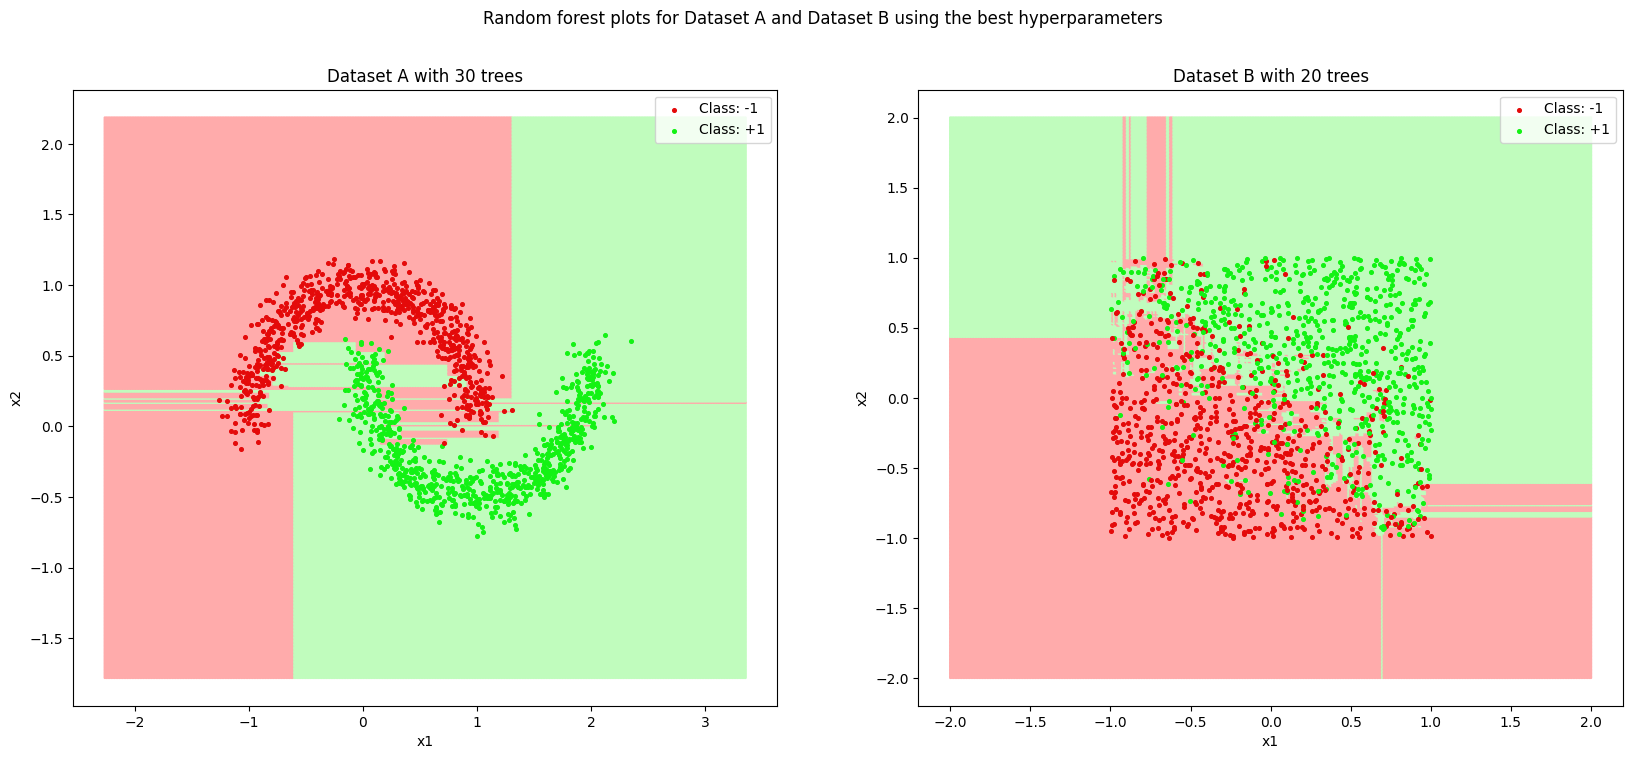

In [4]:
# Generate plots of learned Random Forest classifier on dataset_A and dataset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Total number of plots = 2 

# Dataset A
dataset = np.load("Data/dataset_A.npz")
X, Y, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3'] 

plt.figure(figsize=(20, 8))
plt.suptitle("Random forest plots for Dataset A and Dataset B using the best hyperparameters")

plt.subplot(1,2,1)
alpha = train_random_forest(X, Y, num_trees=1,num_nodes_stop=1,criterion='accuracy')
(x,y) = np.meshgrid(np.linspace(min(X[:,0])-1, max(X[:,0])+1, 400), np.linspace(min(X[:,1])-1, max(X[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = eval_random_forest(alpha, np.vstack((x[i], y[i])).T)

color = np.array(["#ffabab", "#111111", "#c0fcbd"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Dataset A with 30 trees")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y)):
    if(Y[i] == -1):
        c0 = plt.scatter(X[i,0], X[i,1], s=7, c='#e40a0a')
    elif(Y[i] == 1):
        c1 = plt.scatter(X[i,0], X[i,1], s=7, c='#13f214')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])

# Dataset B
dataset = np.load("Data/dataset_B.npz")
X, Y, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3'] 
plt.subplot(1,2,2)
alpha = train_random_forest(X, Y, num_trees=20, num_nodes_stop=1,criterion='accuracy')
(x,y) = np.meshgrid(np.linspace(min(X[:,0])-1, max(X[:,0])+1, 400), np.linspace(min(X[:,1])-1, max(X[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)

for i in range(len(x)):
    Class[i] = eval_random_forest(alpha, np.vstack((x[i], y[i])).T)

color = np.array(["#ffabab", "#111111", "#c0fcbd"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Dataset B with 20 trees")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y)):
    if(Y[i] == -1):
        c0 = plt.scatter(X[i,0], X[i,1], s=7, c='#e40a0a')
    elif(Y[i] == 1):
        c1 = plt.scatter(X[i,0], X[i,1], s=7, c='#13f214')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])
plt.show()